# 常微分方程
---

方程中的未知量是方程而不是变量，并且涉及未知函数导数的方程称为[微分方程](https://zh.wikipedia.org/wiki/微分方程)（Differential Equation, **ED**）。在这类方程中，如果导数的未知函数只有一个因变量，称之为[常微分方程](https://zh.wikipedia.org/wiki/常微分方程)（Ordinary Differential Equation, **ODE**）。如果方程中存在多个变量的导数，则称为[偏微分方程](https://zh.wikipedia.org/wiki/偏微分方程)（Partial Differential Equation, **PDE**）。

常微分方程在科学和工程中有广泛引用。例如根据牛顿第二运动定律，物体在力的作用下的位移$s$和时间$t$的关系就可以表示为如下常微分方程：

$$m{\frac {d^{2}s}{dt^{2}}}=f(s)$$

除非特殊情况，常微分方程的解析闭合解不存在，我们需要使用数值方法进行求解。

## 导入模块
---

为了求解ODE，我们需要使用SymPy库以及SciPy的integrate模块。

In [20]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

import sympy
sympy.init_printing()

from scipy import integrate

## 常微分方程
---

常微分方程的最简单形式是$\frac{dy(x)}{dx}=f(x, y(x))$，其中$y(x)$是未知函数，$f(x, y(x))$是已知函数。由于方程中有$y(x)$的导数，因此这是一个微分方程。同时该方程中只出现了一阶导数，因此这是一阶ODE。更一般的情况下，可以将n阶ODE写为隐式形式$F(x, y, \frac{dy}{dx},\cdots,\frac{d^ny}{dx^n})$，其中$F$是已知函数。

二阶ODE的例子为牛顿第二运动定律$F=ma$，也可写成$F(x(t))=m\frac{d^2x(t)}{dt^2}$。为了求解该ODE，我们除了找到它的一般解，还必须给出对象的初始位置和速度。类似的，$n$阶ODE的一般解有$n$个自由参数，需要给出未知函数的初始条件以及$n-1$阶导数。

高阶ODE总可以重新写成一阶常微分方程组。具体来说，$\frac{d^ny}{d^n}=g(x, y, \frac{dy}{dx},\cdots,\frac{d^ny}{dx^n})$形式的$n$阶ODE可以引入$n$个新函数$y_n = \frac{d^ny}{dx^n}$。这将产生下面的一阶常微分方程组。

$$\frac{d}{dx}
\begin{bmatrix}y_1 \\y_2 \\\vdots \\y_n\end{bmatrix}=
\begin{bmatrix}y_2 \\y_3 \\\vdots \\g(x, y_1, \cdots, y_n)
\end{bmatrix}$$

上式可以写为更紧凑的形式$\frac{d}{dx}\mathbf{y}(x) = f(x, \mathbf{y}(x))$。

牛顿第二定律可以写成标准形式$\mathbf{y}=[y_1=x, y_2=\frac{dx}{dt}]$，或者

$$\frac{d}{dt}
\begin{bmatrix}y_1 \\y_2 \end{bmatrix} = 
\begin{bmatrix}y_2 \\F(y_1)/m\end{bmatrix}$$

如果函数$f_1, f_2, \cdots,f_n$是线性的，那么对应的常微分方程组可以写成简单形式：

$$\frac{d}{dx}\mathbf{y}(x) =\mathbf{A}(x)\mathbf{y}(x) + \mathbf{r}(x)$$

其中$A(x)$是一个n×n的矩阵，$r(x)$是一个仅依赖于x的n维向量，被称为源项。如果$r(x) = 0$，则线性方程组是齐次的。线性常微分方程是可以求解的（例如使用$A(x)$的特征值分解）。对于一般的$f(x, y(x))$，没有通用的求解方法。

## 符号方法求解ODE
---

SymPy提供了一个通用的ODE求解器`sympy.dsolve`，它可以为很多基本的ODE找到解析解。可以符号求解的典型ODE是一阶或者二阶ODE，以及具有较少未知函数的一阶线性ODE方程组。

### 牛顿冷却定律

为了演示SymPy求解ODE的方法，我们考虑一个简单的一阶ODE，牛顿冷却定律$\frac{dT(t)}{dt} = -k(T(t)-T_a)$，其中初始温度$T(0)=T_0$。该定律描述了环境温度$T_a$中的物体温度随时间的变化。

In [9]:
t, k, T0, Ta = sympy.symbols("t, k, T_0, T_a")
T = sympy.Function("T")

将ODE写为$\frac{dT(t)}{dt} + k(T(t)-T_a) = 0$，并为ODE左边创建一个SymPy表达式

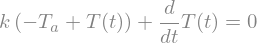

In [13]:
ode = T(t).diff(t) + k*(T(t) - Ta)
sympy.Eq(ode, 0)  # 使用sympy.Eq显示方程

将ODE表达式传递给`sympy.dsolve`函数求解

In [15]:
ode_sol = sympy.dsolve(ode)
ode_sol

找到上述一般解之后，需要使用初始条件来找到未知函数中常数的值。这里创建一个描述初始条件的字典ics={$T(0)$:$T_0$}，然后使用SymPy的subs方法将初始条件应用到ODE的一般解，从而得到未知积分常数$C_1$.

In [16]:
ics = {T(0): T0}
ics

In [17]:
C_eq = ode_sol.subs(t, 0).subs(ics)
C_eq

In [18]:
C_sol = sympy.solve(C_eq)
C_sol

In [19]:
ode_sol.subs(C_sol[0])

### 自动应用初始条件

上述一阶问题求解未知积分常数的过程比较简单直接，但是在高阶问题中应用初始条件和求解积分常数较为繁琐。我们可以将这些步骤集中到一个函数之中，将这个过程推广到任意阶数的微分方程。

In [20]:
def apply_ics(sol, ics, x, known_params):
    """
    Apply the initial conditions (ics), given as a dictionary on
    the form ics = {y(0): y0: y(x).diff(x).subs(x, 0): yp0, ...}
    to the solution of the ODE with indepdendent variable x.
    The undetermined integration constants C1, C2, ... are extracted
    from the free symbols of the ODE solution, excluding symbols in
    the known_params list.
    """
    free_params = sol.free_symbols - set(known_params)
    eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(ics)
           for n in range(len(ics))]
    sol_params = sympy.solve(eqs, free_params)
    return sol.subs(sol_params)

In [21]:
ode_sol

In [24]:
ode_sol = apply_ics(ode_sol, ics, t, [k, Ta])
ode_sol

我们这里画出不同冷却系数下的温度曲线。

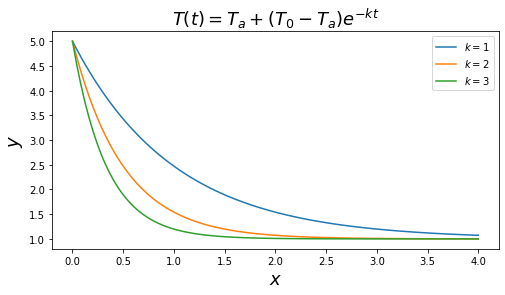

In [26]:
y_x = sympy.lambdify((t, k), ode_sol.rhs.subs({T0: 5, Ta: 1}), 'numpy')

fig, ax = plt.subplots(figsize=(8, 4))

x = np.linspace(0, 4, 100)

for k in [1, 2, 3]:
    ax.plot(x, y_x(x, k), label=r"$k=%d$" % k)

ax.set_title(r"$%s$" % sympy.latex(ode_sol), fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()

### 阻尼振荡器

作为一个稍微复杂一点的例子，我们考虑阻尼谐波振荡器的ODE，这是二阶ODE

$$\frac{d^2 x(t)}{dt^2} + 2 \gamma \omega_0 \frac{d x(t)}{dt} + \omega_0^2 x(t) = 0$$

其中$x(t)$是振荡器在时间$t$的位置，$\omega_0$是无阻尼的振荡频率，$\gamma$是阻尼比。

当阻尼为0时，上式就是简谐运动的运动方程。

In [27]:
t, omega0 = sympy.symbols("t, omega_0", positive=True)
gamma = sympy.symbols("gamma", complex=True)
x = sympy.Function("x")

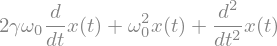

In [28]:
ode = x(t).diff(t, 2) + 2 * gamma * omega0 * x(t).diff(t) + omega0**2 * x(t)
ode

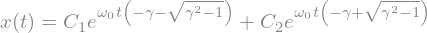

In [29]:
ode_sol = sympy.dsolve(ode)
ode_sol

由于这是一个二阶ODE，因此在一般解中存在两个位置积分常数。需要为位置和速度指定初始条件。

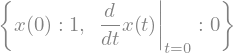

In [30]:
ics = {x(0): 1, x(t).diff(t).subs(t, 0): 0}
ics

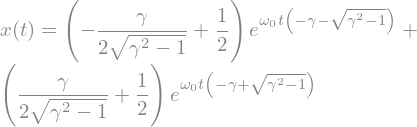

In [31]:
x_t_sol = apply_ics(ode_sol, ics, t, [omega0, gamma])
x_t_sol

对应临界阻尼的$\gamma = 1$直接带入表达式会导致除零错误。我们需要使用极限方法计算$\gamma = 1$这个特殊值。

In [32]:
x_t_critical = sympy.limit(x_t_sol.rhs, gamma, 1)
x_t_critical

最后，我们绘制$\omega_0 = 2 \pi$和不同阻尼比的图形：

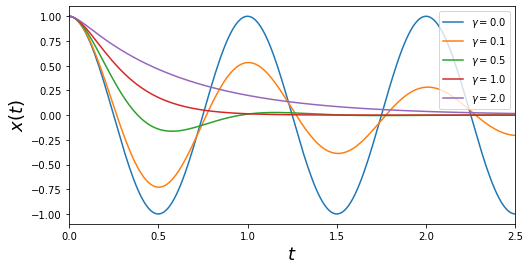

In [36]:
fig, ax = plt.subplots(figsize=(8, 4))

tt = np.linspace(0, 3, 250)
for g in [0.0, 0.1, 0.5, 1, 2.0]:
    if g == 1:
        x_t = sympy.lambdify(t, x_t_critical.subs({omega0: 2.0 * sympy.pi}), 'numpy')
    else:
        x_t = sympy.lambdify(t, x_t_sol.rhs.subs({omega0: 2.0 * sympy.pi, gamma: g}), 'numpy')
    ax.plot(tt, x_t(tt).real, label=r"$\gamma = %.1f$" % g)

ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x(t)$", fontsize=18)
ax.set_xlim(0, 2.5)
ax.legend()

对于$\gamma < 1$，振荡器是欠阻尼的，可以看到解是震荡的；对于$\gamma > 1$，振荡器是过阻尼的，可以看到解是单调衰减的。

对于很多其它形式的方程，SymPy无法找到解析解。例如二阶ODE 
$$\frac{d^2y(x)}{dx^2}=x+y(x)^2$$

In [58]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x

try:
    sympy.dsolve(y(x).diff(x, x) - f)
except NotImplementedError:
    print("NotImplementedError")

NotImplementedError


### 方向场图

方向场图可以用于可视化一阶ODE的可能解。它由x-y平面网格中未知函数斜率的短线组成。

我们只需要遍历坐标网络中感兴趣区域的x和y值，然后计算$f(x, y(x))$在该点的斜率，就可以生成该ODE的方向场图。

在方向场图中，与斜率相切的平滑连续曲线就是ODE的可能解。

In [51]:
def  plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
    f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))
    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]
    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],
                    [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
    ax.axis('tight')
    ax.set_title(r"$%s$" %
                 (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),
                 fontsize=18)
    return ax

使用上面的函数，为$f(x, y(x)) = -x/y(x)$、$f(x, y(x)) = y(x)^2+x$和$f(x, y(x)) = -y(x)$生成方向场图。

<AxesSubplot:title={'center':'$\\frac{d}{d x} y{\\left(x \\right)} = - y{\\left(x \\right)}$'}>

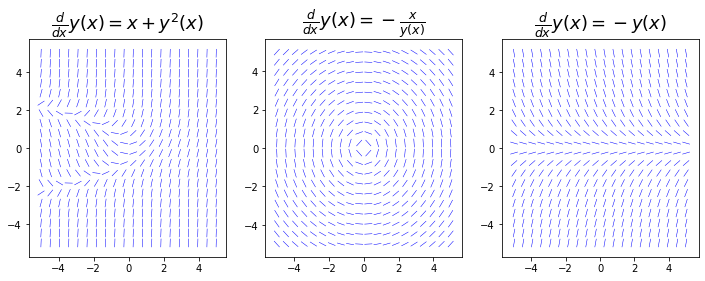

In [52]:
x = sympy.symbols("x")
y = sympy.Function("y")

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

plot_direction_field(x, y(x), y(x)**2 + x, ax=axes[0])
plot_direction_field(x, y(x), -x / y(x), ax=axes[1])
plot_direction_field(x, y(x), -y(x), ax=axes[2])

### 近似解析解

下面我们将借助方向场图对无法解析求解的ODE问题进行可视化分析。

考虑ODE$\frac{dy(x)}{dx}=x+y(x)^2$，初始条件y(0) = 0。

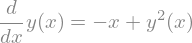

In [14]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = -x + y(x)**2
sympy.Eq(y(x).diff(x), f)

In [15]:
#ics = {y(0): 0}
ode_sol = sympy.dsolve(y(x).diff(x) - f)
ode_sol

TypeError: bad operand type for unary -: 'list'

In [19]:
sympy.dsolve(sympy.Eq(y(x).diff(x), -y(x)**2 + y(x)*x + 1)) 

TypeError: bad operand type for unary -: 'list'

https://github.com/sympy/sympy/issues/19183